In [1]:
#%%python3 -m pip install --upgrade tensorrt
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import tensorrt
print(tensorrt.__version__)
assert tensorrt.Builder(tensorrt.Logger())

import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

pi = np.pi

2023-08-31 14:45:29.282597: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 14:45:29.862044: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


8.6.1


In [2]:
tf.config.list_physical_devices('GPU')

2023-08-31 14:45:34.319411: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-31 14:45:34.334273: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-31 14:45:34.334475: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
print(len(tf.config.list_physical_devices('GPU')))

1


In [4]:
dir = r'/home/luan/Documents/Teste1.csv'

df = pd.read_csv(dir, sep = ' ')

d1 = df[['1']]
d2 = df[['2']]

t = np.array(df[['0']])
GF_re = np.array(d1)
GF_im = np.array(d2)

GF = np.array([GF_re, GF_im])
GF = GF.reshape((2, len(GF[0, :, 0])))

for i in range(2):
    print(np.mean(GF[i]))
    print(np.std(GF[i], ddof = 1))
    print()

-1.9893957643488465
197.2474296641335

-169.60549076617372
438.27308823104227



In [5]:
"""
fig, ax = plt.subplots(2, 1, figsize = (16, 12))

ax[0].plot(t, GF[0])

ax[1].plot(t, GF[1])

plt.show()
"""

'\nfig, ax = plt.subplots(2, 1, figsize = (16, 12))\n\nax[0].plot(t, GF[0])\n\nax[1].plot(t, GF[1])\n\nplt.show()\n'

In [23]:
from sklearn.preprocessing import MinMaxScaler

GF = GF_re

GF = GF.reshape((-1, 1))

sc = MinMaxScaler((-1, 1))
train_scaled = sc.fit_transform(GF)

"""
fig, ax = plt.subplots(2, 1, figsize = (16, 12))

ax[0].plot(t, train_scaled)

#ax[1].plot(t, train_scaled[1])

plt.show()
"""

'\nfig, ax = plt.subplots(2, 1, figsize = (16, 12))\n\nax[0].plot(t, train_scaled)\n\n#ax[1].plot(t, train_scaled[1])\n\nplt.show()\n'

In [24]:
train_size = int(len(GF) * 0.8)
test_size = len(GF) - train_size

In [133]:
lb = 50
features = 2
length = len(GF[0])

x_train = []
y_train = []
for i in range(lb, train_size):
    x_train.append(train_scaled[i-lb:i])
    y_train.append(train_scaled[i])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = []
y_test = []
for i in range(lb+train_size, train_size+test_size):
    x_test.append(train_scaled[i-lb:i])
    y_test.append(train_scaled[i])

x_test= np.array(x_test)
y_test = np.array(y_test)

In [134]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

print(x_train.shape)
print(x_test.shape)

(7900, 100, 1, 1)
(1901, 100, 1, 1)


In [141]:

net = tf.keras.Sequential()

net.add(tf.keras.layers.GRU(120, return_sequences = True, input_shape = (x_train.shape[1], 1)))
net.add(tf.keras.layers.Dropout(0.2))
net.add(tf.keras.layers.GRU(120, return_sequences = True))
net.add(tf.keras.layers.Dropout(0.2))
net.add(tf.keras.layers.GRU(120, return_sequences = True))
net.add(tf.keras.layers.Dropout(0.2))
net.add(tf.keras.layers.GRU(120, return_sequences = False))
net.add(tf.keras.layers.Dropout(0.2))
net.add(tf.keras.layers.Dense(1))

net.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])


2023-08-31 16:13:29.099518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-31 16:13:29.100494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-31 16:13:29.101130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [143]:
hist = net.fit(x_train, y_train, epochs = 20)

Epoch 1/20
247/247 [==============================] - 4s 17ms/step - loss: 2.6376e-04 - mae: 0.0105
Epoch 2/20
247/247 [==============================] - 4s 17ms/step - loss: 2.8288e-04 - mae: 0.0105
Epoch 3/20
247/247 [==============================] - 4s 17ms/step - loss: 2.4854e-04 - mae: 0.0104
Epoch 4/20
247/247 [==============================] - 4s 17ms/step - loss: 2.3681e-04 - mae: 0.0099
Epoch 5/20
247/247 [==============================] - 4s 17ms/step - loss: 2.3284e-04 - mae: 0.0097
Epoch 6/20
247/247 [==============================] - 4s 17ms/step - loss: 2.4136e-04 - mae: 0.0098
Epoch 7/20
247/247 [==============================] - 4s 17ms/step - loss: 2.4339e-04 - mae: 0.0100
Epoch 8/20
247/247 [==============================] - 4s 17ms/step - loss: 2.3069e-04 - mae: 0.0095
Epoch 9/20
247/247 [==============================] - 4s 17ms/step - loss: 2.1890e-04 - mae: 0.0093
Epoch 10/20
247/247 [==============================] - 4s 17ms/step - loss: 2.2828e-04 - mae: 0.0098

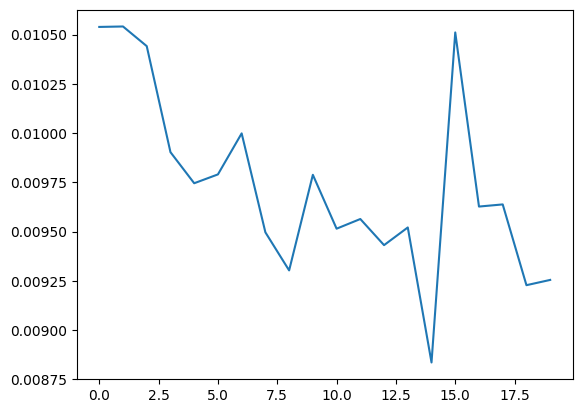

In [144]:
#plt.plot(hist.history['loss'])
plt.plot(hist.history['mae'])

plt.show()

2023-08-31 16:17:02.449352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-31 16:17:02.450315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-31 16:17:02.450986: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 10/247 [>.............................] - ETA: 1s  

2023-08-31 16:17:02.724715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-31 16:17:02.725652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-31 16:17:02.726305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

60/60 [==============================] - 0s 6ms/step
Train Score: 1.00 R2
Test Score: 1.00 R2
Train Score: 9.26 RMSE
Test Score: 21.80 RMSE


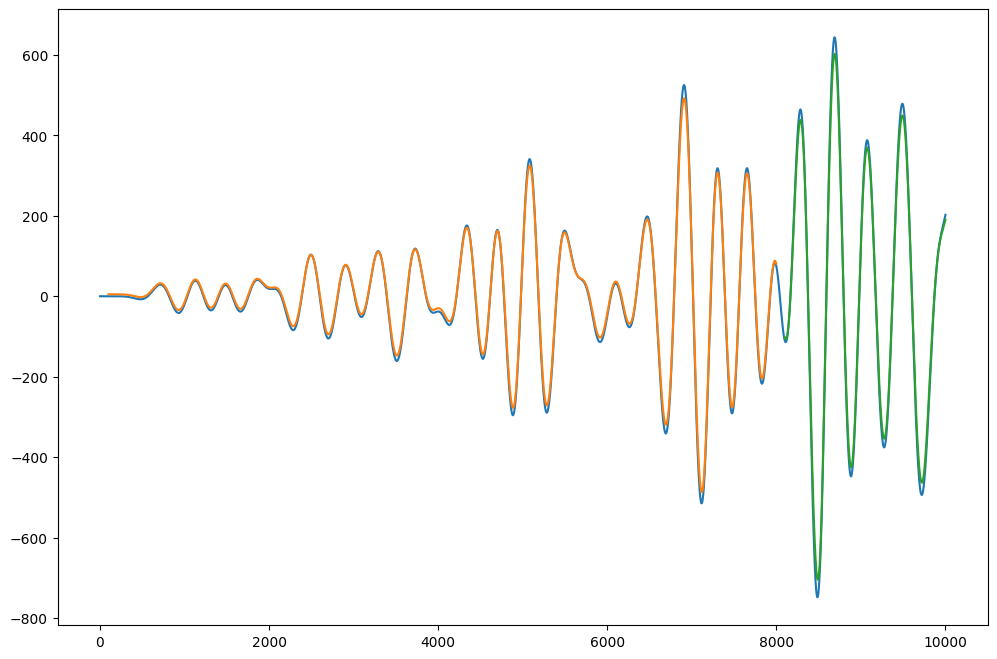

In [145]:
from sklearn.metrics import mean_squared_error, r2_score

trainPredict = net.predict(x_train)
testPredict = net.predict(x_test)

R2_train = r2_score(y_train, trainPredict)
print('Train Score: %.2f R2' % (R2_train))
R2_test = r2_score(y_test, testPredict)
print('Test Score: %.2f R2' % (R2_test))

# invert predictions
trainPredict = sc.inverse_transform(trainPredict)
trainY = sc.inverse_transform(y_train)
testPredict = sc.inverse_transform(testPredict)
testY = sc.inverse_transform(y_test)
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict[:]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict[:]))
print('Test Score: %.2f RMSE' % (testScore))


# shift train predictions for plotting
trainPredictPlot = np.empty_like(GF)
trainPredictPlot[:] = np.nan
trainPredictPlot[lb:len(trainPredict)+lb, :] = trainPredict
# shift test predictions for plotting
# shift test predictions for plotting
testPredictPlot = np.empty_like(GF)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lb*2):len(GF), :] = testPredict
# plot baseline and predictions
fig = plt.figure(figsize = (12, 8))

plt.plot(GF)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [156]:
extrapol = []

seed_batch = y_train[:lb].reshape((1,lb, 1)) #Tirar o ultimo 1 se for RNN

current_batch = seed_batch
for i in range(lb+len(y_test)):
	predicted_value = net.predict_on_batch(current_batch)[0] #Descomentar o [0] se for RNN
	extrapol.append(predicted_value) 
	current_batch = np.append(current_batch[:,1:, :],[[predicted_value]],axis=1)

2023-08-31 16:20:08.027422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1,100,1]
	 [[{{node Placeholder/_0}}]]
2023-08-31 16:20:08.035453: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1,100,1]
	 [[{{node Placeholder/_0}}]]
2023-08-31 16:20:08.042715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

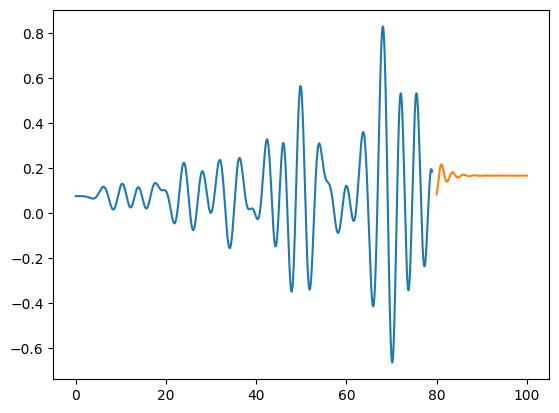

In [158]:
extrapol = np.array(extrapol)

plt.plot(t[:train_size-lb], y_train)
plt.plot(t[train_size:], extrapol[:, 0])

plt.show()